In [79]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import networkx as nx
import random
from sklearn.neighbors import KDTree 


Use the same grid as in Astar problem. Assume there is no graph available. Use RRT/ RRT* to sample paths, build a graph and find the shortest path

Make a gif of the path evolution




In [10]:
# write the Euclidean function that takes in the
# node x, y and compute the distance
def euclidean(node1, node2):
  return ((node1[0]-node2[0])**2+(node1[1]-node2[1])**2)**(1/2)

20


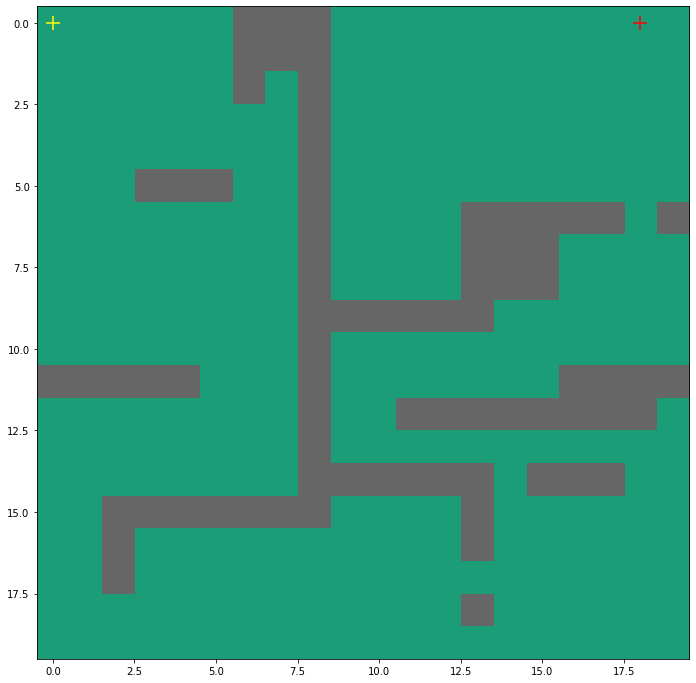

In [56]:
# use np.load to load a grid of 1s and 0s
# 1 - occupied 0- free
grid = np.load("astar_grid.npy")
# you can define your own start/ end
start = (0, 0)
goal = (18, 0)
dim=grid.shape
print(dim[1])
# visualize the start/ end and the robot's environment
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(start[0],start[1], marker = "+", color = "yellow", s = 200)
ax.scatter(goal[0],goal[1], marker = "+", color = "red", s = 200)
plt.show()

In [27]:
#declare an empty graph
G=nx.Graph()
# you can define your own start/ end
start = (0, 0)
goal = (18, 0)
#each node has an attribute "parent"(to which its connected) and "cost_from_start"(path traversal cost from start node to that node)
#we first add the start node in graph
G.add_node(start,parent=(0,0),cost_from_start=0)
print(G.nodes.data())


[((0, 0), {'parent': (0, 0), 'cost_from_start': 0})]


In [134]:
radius_search=3
step_size=1
counter=1
G=nx.Graph()
G.add_node(start,parent=(0,0),cost_from_start=0)
while G.has_node(goal)!=True:
  dist=1000
  if counter!=5:
    np.random.seed()
    rand_point=[0,0]
    rand_point[0]=np.random.uniform(0,dim[0]-1)
    rand_point[1]=np.random.uniform(0,dim[1]-1)
    counter+=1
  else:
    rand_point=list(goal)
    counter=1
  for node in G.nodes:
    if euclidean(rand_point,node) < dist:
      dist=euclidean(rand_point,node)
      nearest_neighbour=node
      #print(dist)
      #print(nearest_neighbour)
  cos_theta=(rand_point[0]-nearest_neighbour[0])/dist
  sin_theta=(rand_point[1]-nearest_neighbour[1])/dist
  if dist>step_size:
    dist=step_size

  rand_point_corrected=[0,0]
  rand_point_corrected[0]=dist*cos_theta+nearest_neighbour[0]
  rand_point_corrected[1]=dist*sin_theta+nearest_neighbour[1]
  #print(rand_point_corrected)
  G_nodes=G.nodes()
  G_nodes=np.asarray(G_nodes)
  tree = KDTree(G_nodes, metric='euclidean')
  indices,neighbour_dist = tree.query_radius([rand_point_corrected],radius_search,return_distance=True)
  indices=indices[0]
  neighbour_dist=neighbour_dist[0]
  dist_1=1000
  for i ,n in zip(indices,neighbour_dist):
    #print(i)
    #print(n)
    if G.nodes[tuple(G_nodes[i])]['cost_from_start']+n < dist_1:
      dist_1= G.nodes[tuple(G_nodes[i])]['cost_from_start']+n
      G.add_node(tuple(rand_point_corrected),parent=tuple(G_nodes[i]),cost_from_start=dist_1)
  for i,n in zip(indices,neighbour_dist):
    i=int(i)
    n=int(n)
    if G.nodes[tuple(G_nodes[i])]['cost_from_start'] > G.nodes[tuple(rand_point_corrected)]['cost_from_start']+n:
      G.add_node(tuple(G_nodes[i]),parent=tuple(rand_point_corrected),cost_from_start=G.nodes[tuple(rand_point_corrected)]['cost_from_start']+n)
print(G.nodes.data())

      

 




[((0, 0), {'parent': (0, 0), 'cost_from_start': 0}), ((0.0537534209166541, 0.9985542397585406), {'parent': (0, 0), 'cost_from_start': 1.0}), ((0.676595481513023, 1.7809018399670855), {'parent': (0.0, 0.0), 'cost_from_start': 1.9050965354023375}), ((1.5109621649938516, 2.332111634416715), {'parent': (0.0, 0.0), 'cost_from_start': 2.7788039404435696}), ((1.8423522174830045, 3.2756054781227757), {'parent': (1.5109621649938516, 2.332111634416715), 'cost_from_start': 3.7788039404435696}), ((2.8224153923575255, 3.0769193607041863), {'parent': (1.5109621649938516, 2.332111634416715), 'cost_from_start': 4.28699760065439}), ((3.2740796921492645, 3.9691073231278216), {'parent': (3.215729719332222, 2.157515292736004), 'cost_from_start': 4.9420388337264445}), ((3.1347846015312637, 4.959358239678633), {'parent': (1.8423522174830045, 3.2756054781227757), 'cost_from_start': 5.90139783221459}), ((4.273839324651213, 3.947182970923718), {'parent': (3.215729719332222, 2.157515292736004), 'cost_from_start